In [33]:
import pandas as pd
import numpy as np
import seaborn as sns

In [34]:
#Read the dataset
b = pd.read_csv('book.csv',encoding='latin1')
b

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [35]:
#To find whether there are any existing null values or not
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [36]:
#Count of duplicated rows
b[b.duplicated()]

,Unnamed: 0,User.ID,Book.Title,Book.Rating


In [37]:
book= b.drop(['Unnamed: 0'],axis=1)
book

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [38]:
#Rename the Delivery column & Sorting column
book = book.rename({'User.ID': 'UserID'}, axis=1)
book = book.rename({'Book.Rating': 'BookRating'}, axis=1)
book = book.rename({'Book.Title': 'BookTitle'}, axis=1)
book

,UserID,BookTitle,BookRating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


<AxesSubplot:>

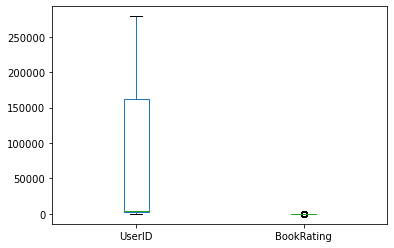

In [39]:
#Outlier Detection
book.plot(kind='box')

<AxesSubplot:>

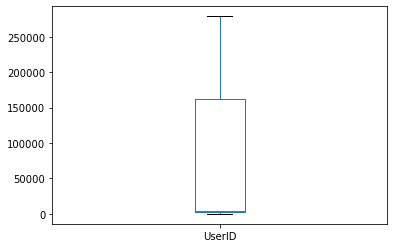

In [40]:
book.UserID.plot(kind='box')

<AxesSubplot:>

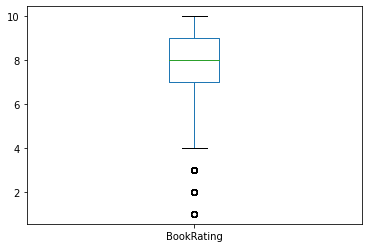

In [41]:
book.BookRating.plot(kind='box')

In [42]:
book.BookRating.describe()

count    10000.00000
mean         7.56630
std          1.82152
min          1.00000
25%          7.00000
50%          8.00000
75%          9.00000
max         10.00000
Name: BookRating, dtype: float64

In [43]:
IQR = 9.00000 - 7.00000
IQR

2.0

In [44]:
#Calculation of lower fence
lower_fence = 7.00000 - (1.5*IQR)
lower_fence

4.0

In [98]:
index=book[book.BookRating<9].index
book = book.drop(index,axis=0)
book

,UserID,BookTitle,BookRating
6,276745,What If?: The World's Foremost Military Histor...,10
16,276760,More Cunning Than Man: A Social History of Rat...,10
23,276772,Mary-Kate &amp; Ashley Switching Goals (Mary-K...,10
24,276772,Tell Me This Isn't Happening,10
34,276788,Sturmzeit. Roman.,10
...,...,...,...
9958,162052,HOUSE OF MIRTH,10
9967,162052,The Man Who Ate the 747,10
9968,162052,Women of Mystery,10
9969,162054,The Maggody Militia: An Arly Hanks Mystery (Ar...,10


In [166]:
df = pd.DataFrame(book)
df
uniques = df.drop_duplicates(keep=False)
duplicates = df[~df.index.isin(uniques.index)]
df

,UserID,BookTitle,BookRating
6,276745,What If?: The World's Foremost Military Histor...,10
16,276760,More Cunning Than Man: A Social History of Rat...,10
23,276772,Mary-Kate &amp; Ashley Switching Goals (Mary-K...,10
24,276772,Tell Me This Isn't Happening,10
34,276788,Sturmzeit. Roman.,10
...,...,...,...
9958,162052,HOUSE OF MIRTH,10
9967,162052,The Man Who Ate the 747,10
9968,162052,Women of Mystery,10
9969,162054,The Maggody Militia: An Arly Hanks Mystery (Ar...,10


In [171]:
#number of unique users in the dataset
len(df.UserID.unique())

564

In [172]:
len(df.BookTitle.unique())     

1724

In [173]:
user_book_df = df.pivot(index='UserID',
                                 columns='BookTitle',
                                 values='BookRating')

In [170]:
user_book_df.head(50)

BookTitle,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off","100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,"20,000 Leagues Under the Sea (Wordsworth Collection)","20,001 Names for Baby",22 Indigo Place,250 Things You Can Do to Make Your Cat Adore You,2nd Chance,30-Minute Meals,...,Your Blue-Eyed Boy : A Novel,Your Isadora: The Love Story of Isadora Duncan &amp; Gordon Craig,Your Mouth Is Lovely : A Novel,Your Pregnancy After 30 (Your Pregnancy Series),Your Second Pregnancy: What to Expect This Time,Z for Zachariah,Zeit im Wind.,Zen Meditations on Being a Mother (Zen Meditations),"Zits Unzipped : Sketchbook #5 (Scott, Jerry, Zits Collection Sketchbook, No. 5.)",\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment
UserID,,,,,,,,,,,,,,,,,,,,,
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
#Impute those NaNs with 0 values
user_book_df.fillna(0, inplace=True)
user_book_df.head(50)

BookTitle,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off","100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,"20,000 Leagues Under the Sea (Wordsworth Collection)","20,001 Names for Baby",22 Indigo Place,250 Things You Can Do to Make Your Cat Adore You,2nd Chance,30-Minute Meals,...,Your Blue-Eyed Boy : A Novel,Your Isadora: The Love Story of Isadora Duncan &amp; Gordon Craig,Your Mouth Is Lovely : A Novel,Your Pregnancy After 30 (Your Pregnancy Series),Your Second Pregnancy: What to Expect This Time,Z for Zachariah,Zeit im Wind.,Zen Meditations on Being a Mother (Zen Meditations),"Zits Unzipped : Sketchbook #5 (Scott, Jerry, Zits Collection Sketchbook, No. 5.)",\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment
UserID,,,,,,,,,,,,,,,,,,,,,
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [179]:
user_sim = 1-pairwise_distances( user_book_df.values,metric='cosine')

In [180]:
pd.DataFrame(user_sim)

,0,1,2,3,4,5,6,7,8,9,...,554,555,556,557,558,559,560,561,562,563
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [181]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,554,555,556,557,558,559,560,561,562,563
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [183]:
#Set the index and column names to user ids 
user_sim_df.index = user_book_df.index
user_sim_df.columns = user_book_df.index
user_sim_df

UserID,12,26,53,70,82,92,99,114,125,133,...,278694,278698,278750,278772,278807,278818,278831,278832,278843,278851
UserID,,,,,,,,,,,,,,,,,,,,,
12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

In [189]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:10]

UserID
12      12
26      12
53      12
70      12
82     882
92      12
99      12
114     12
125     12
133     12
dtype: int64

# First Recommendation

In [198]:
df[(df['UserID']==82) | (df['UserID']==882)]

,UserID,BookTitle,BookRating
2443,82,Still Life with Woodpecker,10
3411,882,The Root Cellar,10
3412,882,AixÃ² Ã©s RÃ dio Pica (ColÂ¨lecciÃ³ Embat),10
3419,882,Chicken Soup for the Teenage Soul II (Chicken ...,10
3420,882,The Husband Test,10
3421,882,Summer,10
3422,882,The Fourth K,10
3423,882,"Elvis, Jesus &amp; Coca-Cola (Kinky Friedman N...",10
3424,882,The Ship Who Searched,10
3427,882,Hornet's Nest,10


In [200]:
user_1=df[df['UserID']==882]

In [201]:
user_2=df[df['UserID']==82]

In [203]:
user_1.BookTitle

3411                                      The Root Cellar
3412           AixÃ² Ã©s RÃ dio Pica (ColÂ¨lecciÃ³ Embat)
3419    Chicken Soup for the Teenage Soul II (Chicken ...
3420                                     The Husband Test
3421                                               Summer
3422                                         The Fourth K
3423    Elvis, Jesus &amp; Coca-Cola (Kinky Friedman N...
3424                                The Ship Who Searched
3427                                        Hornet's Nest
3432    CCNA: Cisco Certified Network Associate Study ...
3438                                       La casa pierde
3439                                   Resistencia humana
3440                                        Leon Africano
3442      Murder on St. Mark's Place (Gaslight Mysteries)
3443                                       State of Grace
3444    Valsalva's Maneuver: Mots Justes and Indispens...
3445                               I love you, I hate you
3447          

In [204]:
user_2.BookTitle

2443    Still Life with Woodpecker
Name: BookTitle, dtype: object

In [205]:
pd.merge(user_1,user_2,on='BookTitle',how='outer')

,UserID_x,BookTitle,BookRating_x,UserID_y,BookRating_y
0,882,The Root Cellar,10,NaN,NaN
1,882,AixÃ² Ã©s RÃ dio Pica (ColÂ¨lecciÃ³ Embat),10,NaN,NaN
2,882,Chicken Soup for the Teenage Soul II (Chicken ...,10,NaN,NaN
3,882,The Husband Test,10,NaN,NaN
4,882,Summer,10,NaN,NaN
5,882,The Fourth K,10,NaN,NaN
6,882,"Elvis, Jesus &amp; Coca-Cola (Kinky Friedman N...",10,NaN,NaN
7,882,The Ship Who Searched,10,NaN,NaN
8,882,Hornet's Nest,10,NaN,NaN
9,882,CCNA: Cisco Certified Network Associate Study ...,10,NaN,NaN


# Second Recommendation

In [229]:
df[(df['UserID']==99) | (df['UserID']==12)]

,UserID,BookTitle,BookRating
2408,12,Apocalypse Wow,10
2459,99,"The Male Body: Features, Destinies, Exposures",10
2462,99,Walt Whitman: A Gay Life,10


In [230]:
user_1=df[df['UserID']==99]

In [231]:
user_2=df[df['UserID']==12]

In [232]:
user_1.BookTitle

2459    The Male Body: Features, Destinies, Exposures
2462                         Walt Whitman: A Gay Life
Name: BookTitle, dtype: object

In [233]:
user_2.BookTitle

2408    Apocalypse Wow
Name: BookTitle, dtype: object

In [234]:
pd.merge(user_1,user_2,on='BookTitle',how='outer')

,UserID_x,BookTitle,BookRating_x,UserID_y,BookRating_y
0,99.0,"The Male Body: Features, Destinies, Exposures",10.0,NaN,NaN
1,99.0,Walt Whitman: A Gay Life,10.0,NaN,NaN
2,NaN,Apocalypse Wow,NaN,12.0,10.0
